# Convolutional Layer and its feature maps

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-CFAR-10-dataset" data-toc-modified-id="Loading-CFAR-10-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading CFAR-10 dataset</a></span><ul class="toc-item"><li><span><a href="#Getting-the-first-batch-of-images-and-their-labels" data-toc-modified-id="Getting-the-first-batch-of-images-and-their-labels-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting the first batch of images and their labels</a></span></li></ul></li><li><span><a href="#Defining-a-single-layered-CNN" data-toc-modified-id="Defining-a-single-layered-CNN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Defining a single layered CNN</a></span><ul class="toc-item"><li><span><a href="#Create-an-object-of-the-defined-CNN" data-toc-modified-id="Create-an-object-of-the-defined-CNN-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create an object of the defined CNN</a></span></li><li><span><a href="#Getting-the-output-(feature-maps)-of-images" data-toc-modified-id="Getting-the-output-(feature-maps)-of-images-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Getting the output (feature maps) of images</a></span></li></ul></li><li><span><a href="#Displaying" data-toc-modified-id="Displaying-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Displaying</a></span><ul class="toc-item"><li><span><a href="#Display-functions" data-toc-modified-id="Display-functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Display functions</a></span></li><li><span><a href="#Original-images" data-toc-modified-id="Original-images-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Original images</a></span></li><li><span><a href="#Feature-maps-of-original-images" data-toc-modified-id="Feature-maps-of-original-images-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature maps of original images</a></span></li></ul></li><li><span><a href="#Changing-stride-and-padding" data-toc-modified-id="Changing-stride-and-padding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Changing stride and padding</a></span></li></ul></div>

## Loading CFAR-10 dataset

In [580]:
import torch
from torchvision import datasets, transforms

#Loading training data
train = datasets.CIFAR10(
    root="", #Folder where the dataset to be stored; empty means stored in current folder
    train=True, #Download the 'training' dataset, False => download 'test' dataset
    download=True, #Should be 'True' in the first time downling the dataset, else 'False'
    transform=transforms.Compose([transforms.ToTensor()])
)

#Loading test data
test = datasets.CIFAR10(
    root="",
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

Files already downloaded and verified
Files already downloaded and verified


In [581]:
from torch.utils.data import DataLoader

trainDL = DataLoader(train, batch_size=8, shuffle=True)
testDL  = DataLoader(test, batch_size=8, shuffle=True)
print("Batch size = ", trainDL.batch_size)
print("Batch size = ", testDL.batch_size)

Batch size =  8
Batch size =  8


### Getting the first batch of images and their labels

In [582]:
data_itr = iter(trainDL)
images, labels = data_itr.next()
print(images.shape)

torch.Size([8, 3, 32, 32])


## Defining a single layered CNN

In [583]:
import torch.nn as nn

class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 3) #(no of input channels, number of output channels, kernel size)
                                         #kernel size 3 => (3,3)
                                         #By default: padding = (0,0) and stride = (1,1)        
            
    def forward(self, x):
        return self.conv1(x)

### Create an object of the defined CNN

In [584]:
cnn = CNN1()

### Getting the output (feature maps) of images

In [585]:
out = cnn(images)
print(out.shape)

torch.Size([8, 10, 30, 30])


[8,10,30,30] ==> [No of images, No of channels in output, height of output image, width of output image]. Dafault padding = (0,0) and stride = (1,1).

## Displaying

### Display functions

In [586]:
import matplotlib.pyplot as plt
import numpy as np

#------------------------------------------------------
#Displays a batch of images
#batch_images => (n_batches, n_channels(3), height, width)
#------------------------------------------------------
def show_batch_images (batch_images):
    n_batches = batch_images.shape[0]
    
    np_batch_images = batch_images.numpy()
    tr_np_batch_images = np.transpose(np_batch_images, (0, 2, 3, 1))
    
    fig, ax = plt.subplots(nrows=1, ncols=n_batches, figsize=(10,10))
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    
    for col in range(n_batches):
        ax[col].imshow(tr_np_batch_images[col])
        
    plt.tight_layout()
    plt.show()
        
#------------------------------------------------------
#Displays feature maps produced by a batch of images
#feature_maps => (n_batches, n_channels, height, width)
#First row => feature maps of first image, and so on
#------------------------------------------------------
def show_feature_maps (feature_maps):
    n_batches      = feature_maps.shape[0]
    n_channels     = feature_maps.shape[1]
    height         = feature_maps.shape[2]
    width          = feature_maps.shape[3] 
    
    fig, ax = plt.subplots(nrows=n_batches, ncols=n_channels, figsize=(10,10))
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    
    for row in range(n_batches):
        for col in range(n_channels):
            ax[row][col].imshow(out[row,col].detach())
            
    plt.tight_layout()
    plt.show()

### Original images

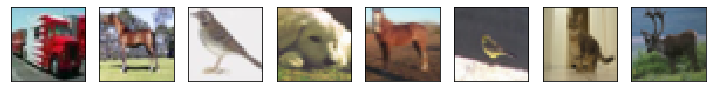

In [587]:
show_batch_images(images)

### Feature maps of original images

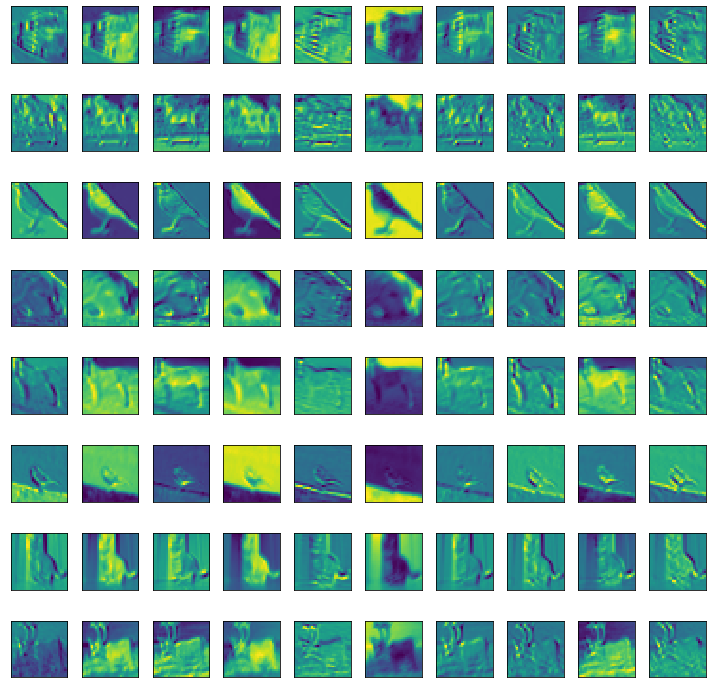

In [588]:
show_feature_maps(out)

## Changing stride and padding

In [589]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 3, stride=(2,2), padding=(1,1)) 
            
    def forward(self, x):
        return self.conv1(x)

In [590]:
cnn2 = CNN2()

In [591]:
out2 = cnn2(images)
print(out2.shape)

torch.Size([8, 10, 16, 16])


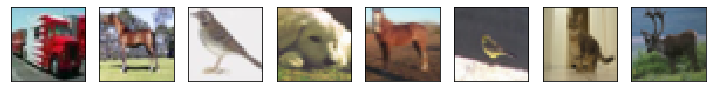

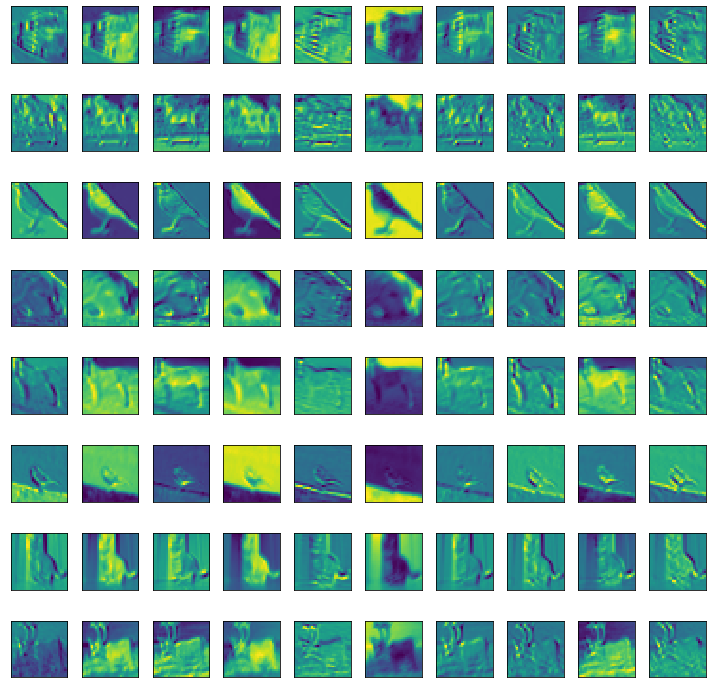

In [592]:
show_batch_images(images)
show_feature_maps(out2)